<h1>Required Imports</h1>

In [ ]:
#@author Sarthak Mohanty

import numpy as np
import pandas as pd

from scipy.stats import norm
import time

import matplotlib.pyplot as plt

<h1> Generating Returns </h1>

[[-0.03733656 -0.09187834]
 [ 0.0011023  -0.1021686 ]
 [-0.05854697  0.02907618]
 ...
 [-0.04054288 -0.00263394]
 [ 0.2253069   0.12078203]
 [ 0.00437876  0.03265283]]


Text(0, 0.5, 'Return')

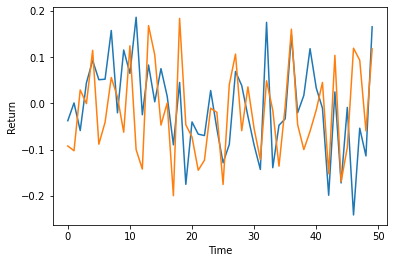

In [1]:
## So, first thing is to simulate returns, then I'll try to test it on Arnav's dataset.

mu = 0.01
sigma = 0.10
bars = 1000
num_assets = 2

returns = np.random.normal(mu, sigma, (bars, num_assets))
print(returns)

# Fake asset names
names = ['Asset %s' %i  for i in range(num_assets)]

# Put in a pandas dataframe
returns = pd.DataFrame(returns, columns=names)

# Plot the last 50 bars
plt.plot(returns.head(50))
plt.xlabel('Time')
plt.ylabel('Return')
# plt.legend()

<h3>Calculating VaR using previous data</h3>

In [5]:
#kwargs is if you want to limit your data to a few days
def historicaL_value_at_risk(value_invested, returns, alpha = 0.99, **kwargs):
    # # Multiply asset returns by weights to get one weighted portfolio return
    # portfolio_returns = returns.iloc[-lookback_days:].dot(weights)
    # # Compute the correct percentile loss and multiply by value invested
    return np.percentile(returns, 100 * (1-alpha)) * value_invested

VaR = historicaL_value_at_risk(100, returns)
print(VaR)

-22.141044704014277


Ideally, since this data is normally distributed, we would want the VaR to be closer to the true value.

The expected value at risk can be calculated using the following:

1. Find the z-score corresponding to .01. Using a z-score table, this comes out to -2.33. 
2. The z-score is then given by $$z = \frac{x - \mu}{\sigma}$$ Since we know $\mu$ and $\sigma$, we can solve for $x$ directly.

<h3>Calculating VaR using parametric assumption</h3>

In this case, we will try to calculate VaR according to a Gaussian model.

In [6]:
def value_at_risk_closed(value_invested, alpha = 0.99, **kwargs):
    # Multiply asset returns by weights to get one weighted portfolio return
    # portfolio_returns = returns.iloc[-lookback_days:].dot(weights)
    # Compute the correct percentile loss and multiply by value invested
    return (mu - sigma * norm.ppf(alpha)) * value_invested

VaR = value_at_risk_closed(100)
print(VaR)

-22.263478740408406
